In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

In [2]:
iris = pd.read_csv("iris.csv")

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [3]:
## 사용할 피쳐 컬럼

# iris.columns[:-1]
features = ["sepal_length", "sepal_width"]

In [4]:
df = iris[features]

df.head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [44]:
# pca = PCA(n_components=2)

# pca_2 = pca.fit_transform(df)

df.iloc[:, 0]

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64

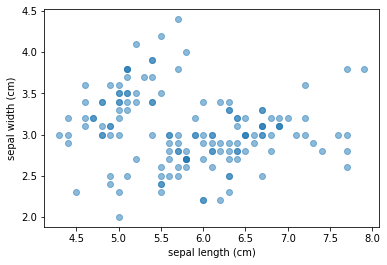

In [5]:
from matplotlib import pyplot as plt
x = df.iloc[:, 0] # sepal_length
y = df.iloc[:, 1] # sepal_width
plt.scatter(x, y, alpha=0.5)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

In [53]:
## https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html

np.random.uniform(1,10,3)

array([8.73186324, 1.00575934, 8.01798788])

In [6]:
cent_numbs = 3
# 랜덤으로 x, y 좌표 3개를 생성합니다
# np.random.uniform은 주어진 최소, 최대값 사이에서 k 개 만큼 실수 난수를 생성합니다.
centroids_x = np.random.uniform(min(x), max(x), cent_numbs)
centroids_y = np.random.uniform(min(y), max(y), cent_numbs)
centroids = list(zip(centroids_x, centroids_y))
centroids

[(6.638951058372849, 3.1702689767130945),
 (7.3012310531233595, 4.360477309474889),
 (6.851331693192751, 3.5368680163616926)]

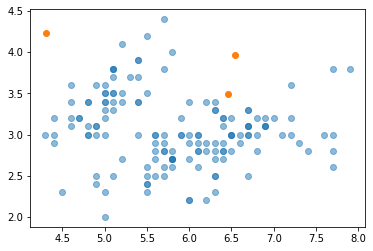

In [55]:
plt.scatter(x, y, alpha=0.5)	# 데이터들은 파란색으로 표시되고
plt.scatter(centroids_x, centroids_y)	# centroids는 주황색으로 표시됩니다
plt.show()

#### 유클리디안 거리 계산

<img src="https://velog.velcdn.com/images/newnew_daddy/post/c5edca47-2985-4902-a3b7-8bef88b77d1d/image.png" width="35%">

In [57]:
np.sqrt(25)

5.0

In [7]:
def uc_distance(a, b):
    dx = abs(a[0] - b[0])
    dy = abs(a[1] - b[1])
    
    return np.sqrt(dx**2 + dy**2)

In [64]:
sepal_length_width = np.array(list(zip(x, y)))
uc_distance(sepal_length_width[1], centroids[0])

1.6397036810473147

In [73]:
labels = np.zeros(len(df))

for i in range(len(df)):
    distances = np.zeros(cent_numbs)
    
    for j in range(cent_numbs):
        distances[j] = uc_distance(sepal_length_width[i], centroids[j])
    cluster = np.argmin(distances)
    labels[i] = cluster

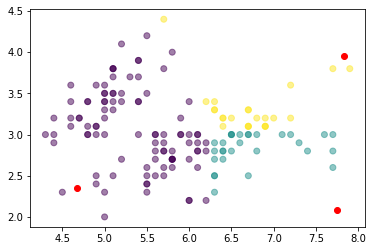

In [75]:
plt.scatter(x, y, c=labels, alpha=0.5)
plt.scatter(centroids_x, centroids_y, c='red')
plt.show()

In [76]:
## centroid update


centroids_old = deepcopy(centroids)

centroids_old

[(4.675015111528913, 2.3565564865747026),
 (7.749865419465825, 2.081056613093015),
 (7.826007478729053, 3.9477438999104173)]

In [94]:
df.shape, labels.shape, type(df), type(pd.DataFrame(labels))

df_lb = pd.concat([df, pd.DataFrame(labels, columns=['label'])], axis=1)

In [95]:
points = []

df_0 = df_lb[df_lb['label'] == 0]
df_1 = df_lb[df_lb['label'] == 1]
df_2 = df_lb[df_lb['label'] == 2]

df_0.shape, df_1.shape, df_2.shape

((97, 3), (29, 3), (24, 3))

In [105]:
df_0.iloc[:, [0, 1]].values.tolist()

np.mean(df_0.iloc[:, [0, 1]].values.tolist(), axis=0)

array([5.35154639, 3.06082474])

In [107]:
print(centroids)

for k in range(cent_numbs):
    _df = df_lb[df_lb['label'] == k]
    _means = np.mean(_df.iloc[:, [0, 1]].values.tolist(), axis=0)
    
    centroids[k] = _means
    
print(centroids)

[(4.675015111528913, 2.3565564865747026), (7.749865419465825, 2.081056613093015), (7.826007478729053, 3.9477438999104173)]
[array([5.35154639, 3.06082474]), array([6.75862069, 2.82758621]), array([6.725     , 3.32083333])]


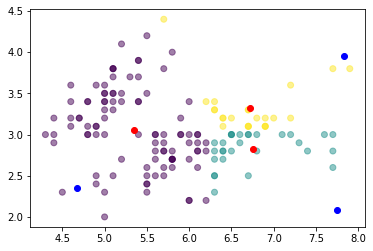

In [111]:
plt.scatter(x, y, c=labels, alpha=0.5)
plt.scatter([i[0] for i in centroids_old], [i[1] for i in centroids_old], c='blue')
plt.scatter([i[0] for i in centroids], [i[1] for i in centroids], c='red')
plt.show()

In [19]:
from IPython.display import clear_output
import time

x = df.iloc[:, 0] # sepal_length
y = df.iloc[:, 1] # sepal_width
sepal_length_width = list(zip(x, y))

ITER :  1


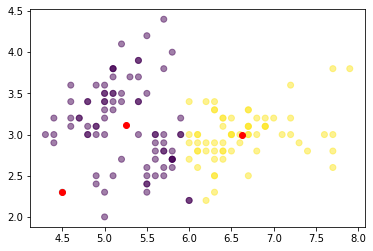

ITER :  2


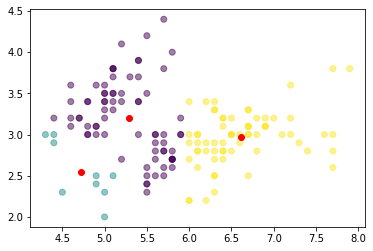

ITER :  3


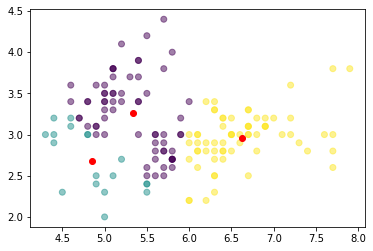

ITER :  4


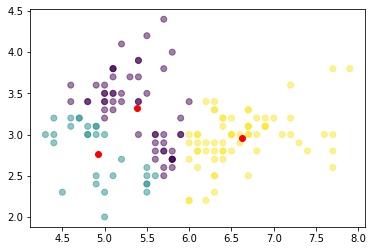

ITER :  5


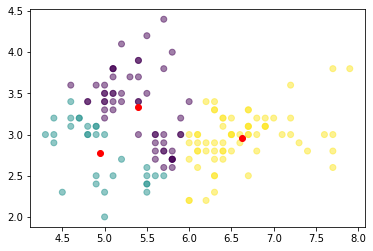

ITER :  6


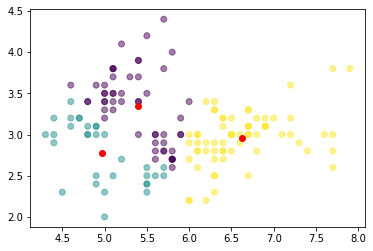

In [20]:

centroids_x = np.random.uniform(min(x), max(x), cent_numbs)
centroids_y = np.random.uniform(min(y), max(y), cent_numbs)
_centroids = list(zip(centroids_x, centroids_y))
_labels = np.zeros(len(df))
_diff = np.zeros(cent_numbs)

for i in range(6):
    print("ITER : ", i+1)
    for i in range(len(df)):
        distances = np.zeros(cent_numbs)
        
        for j in range(cent_numbs):
            distances[j] = uc_distance(sepal_length_width[i], _centroids[j])
        cluster = np.argmin(distances)
        _labels[i] = cluster
        
    centroids_old = deepcopy(_centroids)

    df_lb = pd.concat([df, pd.DataFrame(_labels, columns=['label'])], axis=1)

    for k in range(cent_numbs):
        _df = df_lb[df_lb['label'] == k]
        _means = np.mean(_df.iloc[:, [0, 1]].values.tolist(), axis=0)
        
        _centroids[k] = _means
        
        _diff[k] = uc_distance(centroids_old[k], _centroids[k])
    plt.scatter(x, y, c=_labels, alpha=0.5)
    # plt.scatter([i[0] for i in centroids_old], [i[1] for i in centroids_old], c='blue')
    plt.scatter([i[0] for i in _centroids], [i[1] for i in _centroids], c='red')
    plt.show()
    # clear_output(wait=True)
    # time.sleep(1.5)
    if not sum(_diff): 
        plt.scatter(x, y, c=_labels, alpha=0.5)
        # plt.scatter([i[0] for i in centroids_old], [i[1] for i in centroids_old], c='blue')
        plt.scatter([i[0] for i in _centroids], [i[1] for i in _centroids], c='red')
        plt.show()
        break

## Clustering with sklearn

In [215]:
from sklearn.cluster import KMeans

In [217]:
model = KMeans(n_clusters=3)

In [ ]:
x = df.iloc[:, 0] # sepal_length
y = df.iloc[:, 1] # sepal_width

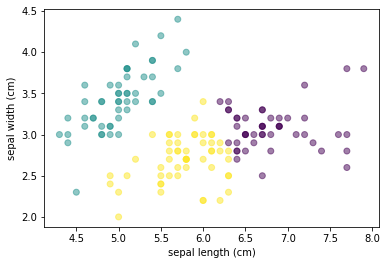

In [237]:
model = KMeans(n_clusters = 3)
model.fit(df)
labels = model.predict(df)
# 클러스터링 결과를 시각화합니다
x = df.iloc[:, 0] # sepal_length
y = df.iloc[:, 1] # sepal_width
plt.scatter(x, y, c=labels, alpha=0.5)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

In [225]:
target = df_lb['label']

In [226]:
species = np.chararray(target.shape, itemsize=150)
for i in range(len(df)):
  if target[i] == 0:
    species[i] = 'setosa'
  elif target[i] == 1:
    species[i] = 'versicolor'
  elif target[i] == 2:
    species[i] = 'virginica'


In [234]:
import pandas as pd

df_2 = pd.DataFrame({'labels': labels, 'species': species})
ct = pd.crosstab(df_2['labels'], df_2['species'])
print(ct)


species  b'setosa'  b'versicolor'  b'virginica'
labels                                         
0               47              0             0
1                0              0            50
2                0             53             0


## Elbow Method

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


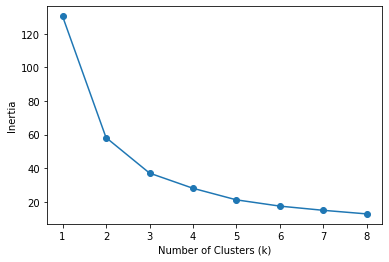

In [235]:
num_clusters = list(range(1, 9))	# K는 1 ~ 8사이의 정수입니다
inertias = []
# 각 K별로 모델을 생성하여 inertia를 측정합니다
for i in num_clusters:
    model = KMeans(n_clusters=i)
    model.fit(df)
    inertias.append(model.inertia_)
# K에 따른 inertia의 변화를 시각화합니다
plt.plot(num_clusters, inertias, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


## 계층적 클러스터링

In [250]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import AgglomerativeClustering

In [240]:
_iris = iris[iris.columns[:-1]]

In [254]:
model = AgglomerativeClustering(linkage="ward", n_clusters=3)

model.fit(_iris)
predicted_labels = model.labels_

predicted_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

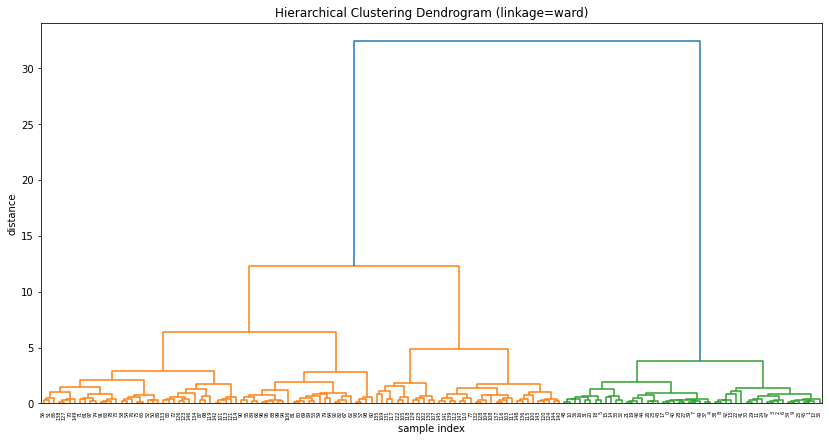

In [261]:
linkage_matrix = linkage(_iris, 'ward', 'euclidean')
plot = plt.figure(figsize=(14, 7))
dendrogram(linkage_matrix, orientation='top', distance_sort='descending', show_leaf_counts=True)
# dendrogram(
#     linkage_matrix,
#     truncate_mode='lastp',  
#     p=10,  
#     leaf_rotation=90., 
#     leaf_font_size=12., 
#     show_contracted=True, 
# )
plt.title('Hierarchical Clustering Dendrogram (linkage=ward)')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.show()

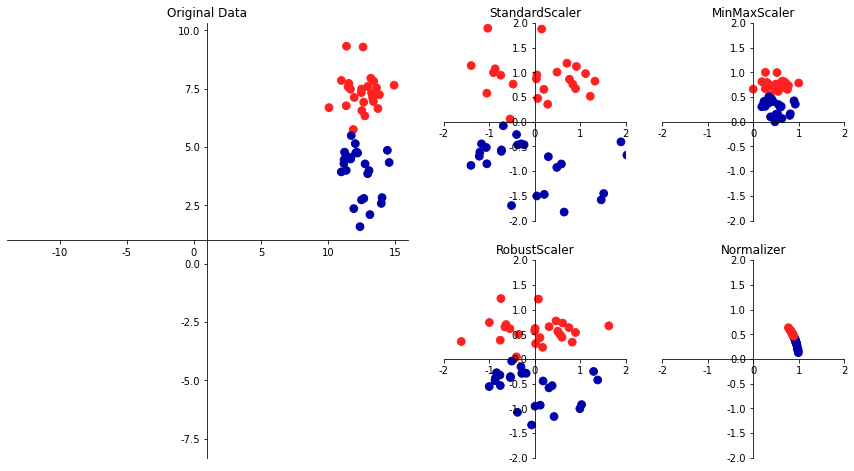

In [283]:
import mglearn
import matplotlib.pyplot as plt

mglearn.plots.plot_scaling()
plt.show()

## DBSCAN

https://www.youtube.com/watch?v=RDZUdRSDOok

<AxesSubplot:xlabel='0', ylabel='1'>

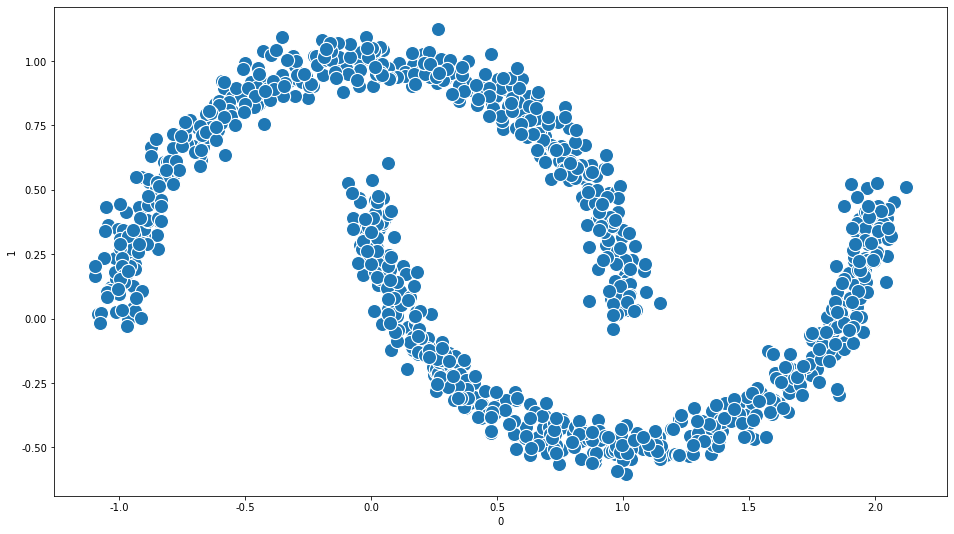

In [273]:
from sklearn.datasets import make_moons
import numpy as np
import seaborn as sns

n_samples = 1000
np.random.seed(3)
X, y = make_moons(n_samples=n_samples, noise=.05)  # noise: 잡음의 크기. 0이면 정확한 반원을 이룸
df = pd.DataFrame(X)

#시각화
plt.figure(figsize=(16, 9))
sns.scatterplot(x=df[0], y=df[1], marker='o', s=200)


In [277]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2, random_state = 123)
model.fit(df)
df['kmeans_label'] = model.predict(df)

df.head()

,0,1,kmeans_label
0,0.418668,-0.303678,0
1,1.054227,-0.443849,0
2,1.851153,0.081618,0
3,0.353825,0.914599,1
4,0.144472,-0.033702,1


<AxesSubplot:xlabel='0', ylabel='1'>

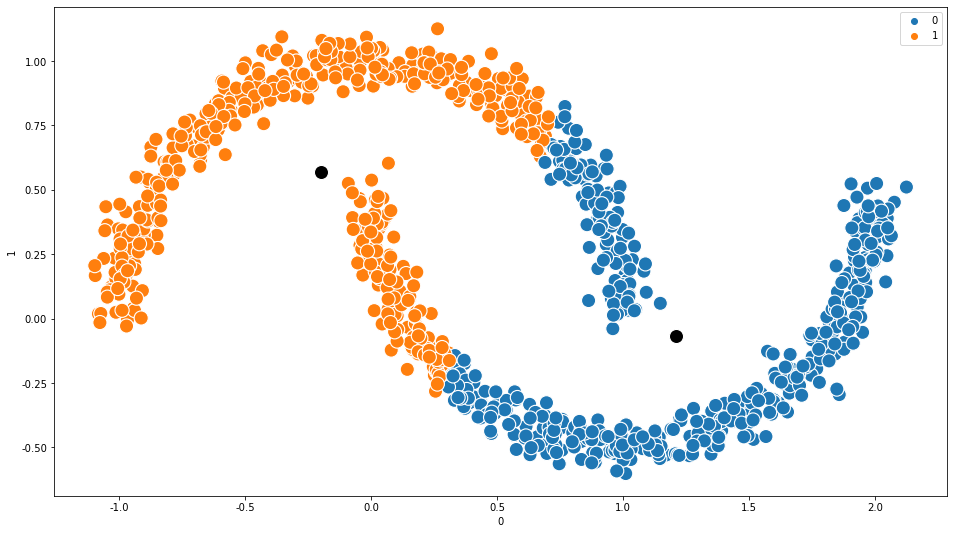

In [278]:
# 각 군집의 중심점
centers = model.cluster_centers_

# 클러스터링 결과 시각화
plt.figure(figsize=(16, 9))

sns.scatterplot(x=df[0], y=df[1], hue=df['kmeans_label'] , s=200)
sns.scatterplot(x=centers[:,0], y=centers[:,1], color='black', s=200)

In [279]:
df = df.drop('kmeans_label', axis=1)

df.head()

,0,1
0,0.418668,-0.303678
1,1.054227,-0.443849
2,1.851153,0.081618
3,0.353825,0.914599
4,0.144472,-0.033702


<AxesSubplot:xlabel='0', ylabel='1'>

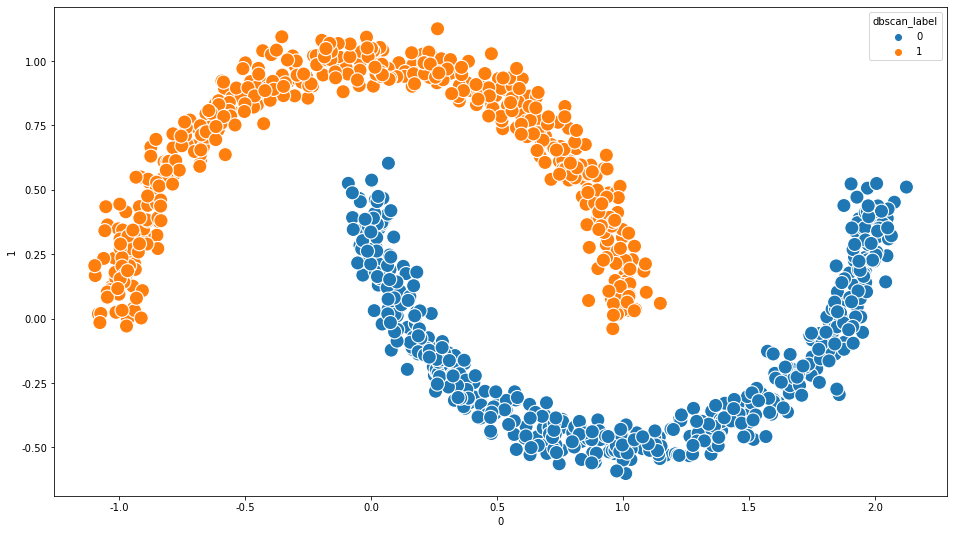

In [280]:
from sklearn.cluster import DBSCAN

eps = 0.1 # 반경
min_samples = 5 # 최소 데이터 갯수

# DBSCAN 모델 학습
model = DBSCAN(eps=eps, min_samples=min_samples)
model.fit(df)
df['dbscan_label'] = model.labels_

# 시각화
plt.figure(figsize=(16, 9))
sns.scatterplot(x=df[0], y=df[1], hue=df['dbscan_label'], s=200)


## GMM

https://www.youtube.com/watch?v=C7jhwN6H9LU

<AxesSubplot:xlabel='0', ylabel='1'>

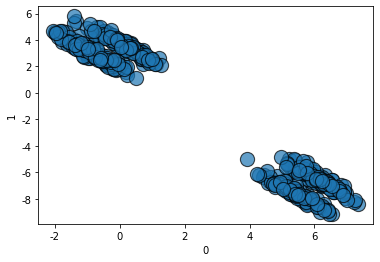

In [316]:
from sklearn.datasets import make_blobs

n_samples = 500   # 샘플 데이터 개수
centers = 4   # 클러스터 개수
cluster_std = 0.75   # 클러스터 내 표준편차
random_state = 13   # 샘플 데이터 고정
 
data, clusters = make_blobs(n_samples=n_samples, centers=centers, cluster_std=cluster_std, random_state=random_state)

# 데이터 타원형으로 만들기
tf = [[0.6, -0.6], [-0.4, 0.8]]
data_tf = data @ tf  # @ : 행렬의 곱을 나타냄
df = pd.DataFrame(data_tf)

# 시각화
sns.scatterplot(x=df[0], y=df[1], alpha = 0.7, edgecolor="k", s=200)


<AxesSubplot:xlabel='0', ylabel='1'>

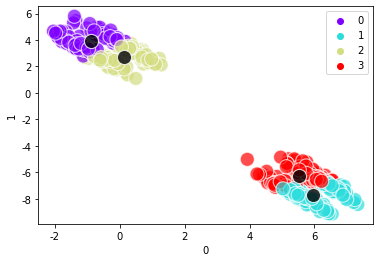

In [317]:
# k-means 학습
model = KMeans(n_clusters=4, random_state=123)
model.fit(df)
df['kmeans_label'] = model.predict(df)
centers = model.cluster_centers_ # 각 클러스터의 Centorid

# 시각화
sns.scatterplot(x=df[0], y=df[1], hue=df['kmeans_label'], palette='rainbow', alpha=0.7, s=200)
sns.scatterplot(x=centers[:,0], y=centers[:,1], color='black', alpha=0.8, s=200)


<AxesSubplot:xlabel='0', ylabel='1'>

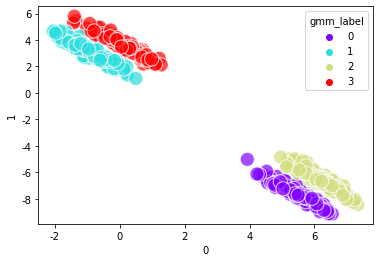

In [294]:
from sklearn.mixture import GaussianMixture

n_components = 4    # 분포 개수
random_state = 10   # 모델 고정

model = GaussianMixture(n_components=n_components, random_state=random_state)

# GMM 모델 학습
model.fit(df)
df['gmm_label'] = model.predict(df)

# 시각화
sns.scatterplot(x=df[0], y=df[1],  hue=df['gmm_label'], palette='rainbow', alpha=0.7, s=200)

<AxesSubplot:xlabel='0', ylabel='1'>

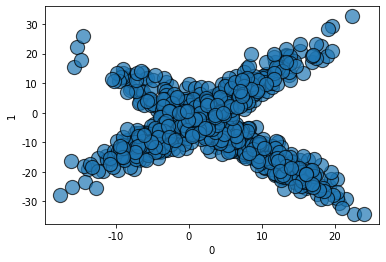

In [323]:
from sklearn.datasets import make_blobs

n_samples = 500   # 샘플 데이터 개수
centers = 1   # 클러스터 개수
cluster_std = 10  # 클러스터 내 표준편차
random_state = 13   # 샘플 데이터 고정
 
data, clusters = make_blobs(n_samples=n_samples, centers=centers, cluster_std=cluster_std, random_state=random_state)
data1, clusters1 = make_blobs(n_samples=n_samples, centers=centers, cluster_std=cluster_std, random_state=random_state)

# 데이터 타원형으로 만들기
tf = [[0.6, -0.6], [-0.4, 0.8]]
tf1 = [[0.6, 0.6], [0.4, 0.8]]
# data_tf = data @ tf  # @ : 행렬의 곱을 나타냄
data_tf = data.dot(tf)  # @ : 행렬의 곱을 나타냄
data_tf1 = data1.dot(tf1)  # @ : 행렬의 곱을 나타냄
df = pd.DataFrame(data_tf)
df1 = pd.DataFrame(data_tf1)

ddf = pd.concat([df, df1], axis=0)
# 시각화
sns.scatterplot(x=ddf[0], y=ddf[1], alpha = 0.7, edgecolor="k", s=200)

<AxesSubplot:xlabel='0', ylabel='1'>

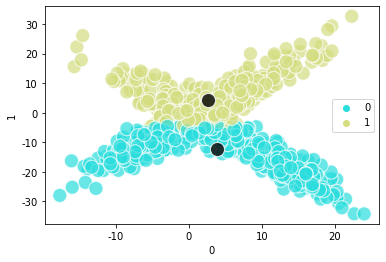

In [320]:
# k-means 학습
model = KMeans(n_clusters=2, random_state=123)
model.fit(ddf)
ddf['kmeans_label'] = model.predict(ddf)
centers = model.cluster_centers_ # 각 클러스터의 Centorid

# 시각화
sns.scatterplot(x=ddf[0], y=ddf[1], hue=ddf['kmeans_label'], palette='rainbow', alpha=0.7, s=200)
sns.scatterplot(x=centers[:,0], y=centers[:,1], color='black', alpha=0.8, s=200)


<AxesSubplot:xlabel='0', ylabel='1'>

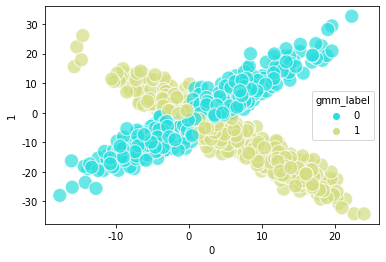

In [324]:
from sklearn.mixture import GaussianMixture

n_components = 2    # 분포 개수
random_state = 10   # 모델 고정

model = GaussianMixture(n_components=n_components, random_state=random_state)

# GMM 모델 학습
model.fit(ddf)
ddf['gmm_label'] = model.predict(ddf)

# 시각화
sns.scatterplot(x=ddf[0], y=ddf[1],  hue=ddf['gmm_label'], palette='rainbow', alpha=0.7, s=200)